In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'February 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [9]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-02-28     -248   -670        -93 -25   0     4    -46     -44       6

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

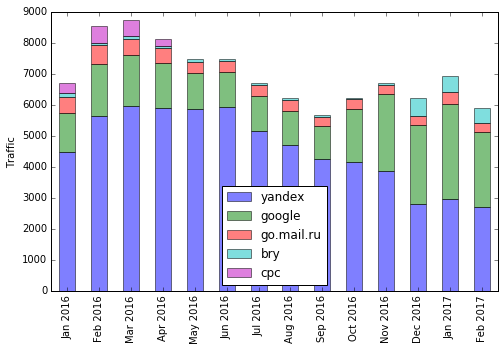

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

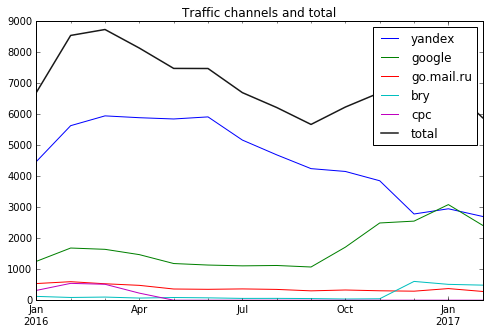

In [12]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [22]:
kw = 'keyword visit'.split()

In [23]:
data[kw]

keyword  visit
bing   0                                   двери межкомнатные     31
       1                       двери с доставкой и установкой     21
       2                                   двери с фурнитурой     21
       3                             установка входных дверей     21
       4                                       двери под ключ     20
       5                                    двери беленый дуб     19
       6                                          серые двери     17
       7                                   межкомнатные двери     16
       8                         межкомнатные двери с замками     16
       9                               входные двери недорого     14
       10                         магазин межкомнатных дверей     14
       11                                               двери     11
       12                                   двери с капителью     11
       13                                    двери со скидкой     11
       14                                 двери эмалированные     11
       15                             интернет магазин дверей     11
       16                       межкомнатные двери с зеркалом     11
       17                                   двери белорусские     10
       18                                         двери эмаль      8
       19                                     доставка дверей      8
       20                                   арки межкомнатные      7
       21                                         двери венге      7
       22                                  двери для квартиры      7
       23                                         двери софья      7
       24                                 двери шпонированные      7
       25                               дешевые входные двери      7
       26                                        двери эконом      6
       27                                      двери волховец      5
       28                                          двери купе      5
       29                                      двери недорого      5
...                                                       ...    ...
yandex 565                            размер дверного полотна      1
       566         размер дверного полотна межкомнатной двери      1
       567                           размеры дверного полотна      1
       568       размеры дверного полотна межкомнатных дверей      1
       569       размеры дверного полотна межкомнатных дверей      1
       570        размеры дверных полотен межкомнатных дверей      1
       571              размеры стандартного дверного полотна      1
       572  сколько стоит доставка дверного полотна из маг...      1
       573               стандартная толщина дверного полотна      1
       574                стандартное дверное полотно размеры      1
       575                стандартное дверное полотно размеры      1
       576                          стандартное полотно двери      1
       577                стандартный размер дверного полотна      1
       578                         стеклянное дверное полотно      1
       579       стеклянное дверное полотно 900 2000 для душа      1
       580                  стеклянные дверные полотна 40х200      1
       581                стоимость дверного полотна 60 х 200      1
       582                         толщина 45 дверное полотно      1
       583        толщина дверного полотна межкомнатной двери      1
       584                     уголки на дверной проем купить      1
       585       установка дверного полотна на старую коробку      1
       586          установка и перестановка дверного полотна      1
       587  филенчатые дверное полотно из массива сосны де...      2
       588        фирма марио риоли дверное полотно фортунато      1
       589  фирма русская дверная компания по поставке две...      2
       590                                фото полотен дверей      1
       591                            что такое поло

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [24]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери межкомнатные,31
go.mail.ru,купить раздвижные двери межкомнатные дешево,16
google,np - /?cnt=catalog&r=2438,978
rambler,двери межкомнатные от производителя выезд заме...,3
yahoo,np - /,5
yandex,(not set),1951


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [25]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                 двери межкомнатные     31
           1                     двери с доставкой и установкой     21
           2                                 двери с фурнитурой     21
           3                           установка входных дверей     21
           4                                     двери под ключ     20
go.mail.ru 0        купить раздвижные двери межкомнатные дешево     16
           1                        межкомнатные двери недорого     14
           2                 купить двери межкомнатные недорого     12
           3                                   www.took-took,ru      8
           4                      межкомнатная деревянная дверь      7
google     0                          np - /?cnt=catalog&r=2438    978
           1                          np - /?cnt=catalog&r=1428    399
           2                                             np - /    293
           3                                   np - /?pid=pokaz    163
           4                          np - /?cnt=catalog&r=1010     82
rambler    0  двери межкомнатные от производителя выезд заме...      3
           1                        межкомнатные двери под ключ      2
           2                      раздвижные межкомнатные двери      2
           3                                двери купе заказать      1
           4                               дверное полотно 3 см      1
yahoo      0                                             np - /      5
           1                          np - /?cnt=catalog&r=1428      5
           2                          np - /?cnt=catalog&r=2438      3
           3                          np - /?pid=dveri-ecoshpon      3
           4                            np - /?pid=menu-katalog      2
yandex     0                                          (not set)   1951
           1  межкомнатные двери недорого с установкой под ключ     53
           2                                      тук тук двери      9
           3                                 took-took.ru двери      8
           4                                              двери      8